In [1]:
# 多层网络的实现

In [2]:
import tensorflow as tf
import numpy as np

sess = tf.Session()

In [23]:
# 创建图片
x_shape = [1, 4, 4, 1]
x_val = np.random.uniform(size=x_shape)

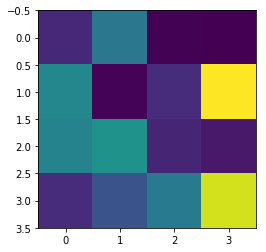

In [25]:
import matplotlib.pyplot as plt

plt.imshow(x_val[0, :, :, 0])
plt.show()

In [26]:
# 创建占位符
x_data = tf.placeholder(tf.float32, shape=x_shape)

In [27]:
# 进行卷积运算
my_filter = tf.constant(0.25, shape=[2, 2, 1, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME', name='Moving_Avg_Window')

In [28]:
# 然后自定义一个层，对卷积层的结果进行运算，乘以一个2x2的矩阵，然后通过一个sigmoid函数。注意，由于矩阵运算都是涉及二维的操作，所以需要使用tf.squeeze将
# 维度里的值为1的维度压缩掉
def custom_layer(input_matrix):
    input_matrix_squeezed = tf.squeeze(input_matrix)
    A = tf.constant([[1., 2.], [-1., 3.]])
    B = tf.constant(1., shape=[2, 2])
    tmp1 = tf.matmul(A, input_matrix_squeezed)
    tmp2 = tf.add(tmp1, B)
    return tf.nn.sigmoid(tmp2)

In [29]:
with tf.name_scope('Custom_layer') as scope:
    custom_layer1 = custom_layer(mov_avg_layer)

In [30]:
# 然后可以将值喂进去
print(sess.run(custom_layer1, feed_dict={x_data: x_val}))

[[0.910589   0.9183361 ]
 [0.88087744 0.8881569 ]]


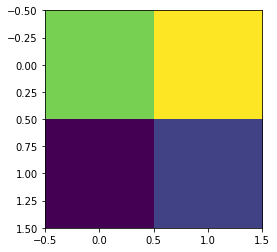

In [31]:
res = sess.run(custom_layer1, feed_dict={x_data: x_val})
plt.imshow(res)
plt.show()

In [32]:
# 使用lena的例子再做一下
import matplotlib.image as mpimg

lena = mpimg.imread('lena.jpeg')
lena.shape

(129, 129, 3)

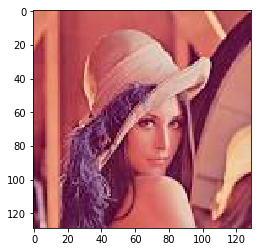

In [33]:
plt.imshow(lena)
plt.show()

In [34]:
lena = np.expand_dims(lena, axis=0)
lena.shape

(1, 129, 129, 3)

In [35]:
x_data = tf.placeholder(tf.float32, shape=[1, 129, 129, 3])

In [36]:
my_filter = tf.constant(0.25, shape=[2, 2, 3, 1])
my_strides = [1, 2, 2, 1]
mov_avg_layer = tf.nn.conv2d(x_data, my_filter, my_strides, padding='SAME', name='Mov_Avg_layer')

In [37]:
print(sess.run(mov_avg_layer, feed_dict={x_data: lena}))

[[[[468.25]
   [460.25]
   [447.5 ]
   ...
   [368.75]
   [416.25]
   [200.75]]

  [[460.25]
   [454.25]
   [446.5 ]
   ...
   [367.  ]
   [197.5 ]
   [ 72.75]]

  [[455.  ]
   [455.25]
   [453.25]
   ...
   [200.  ]
   [147.5 ]
   [ 87.75]]

  ...

  [[189.75]
   [261.5 ]
   [531.25]
   ...
   [231.5 ]
   [190.5 ]
   [ 86.  ]]

  [[171.5 ]
   [191.5 ]
   [596.  ]
   ...
   [173.5 ]
   [185.5 ]
   [124.  ]]

  [[ 85.5 ]
   [ 90.25]
   [288.  ]
   ...
   [ 80.5 ]
   [123.25]
   [ 79.5 ]]]]


In [38]:
lena_tmp = sess.run(mov_avg_layer, feed_dict={x_data: lena})
lena_tmp.shape

(1, 65, 65, 1)

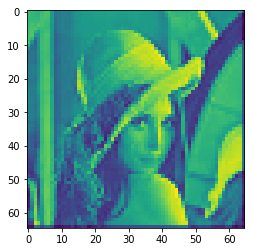

In [39]:
plt.imshow(lena_tmp[0, :, :, 0])
plt.show()

In [41]:
def custom(input_matrix):
    input_matrix_squeeze = tf.squeeze(input_matrix)
    A = tf.random_normal([65, 65], dtype=tf.float32)
    B = tf.constant(1., shape=[65, 65])
    tmp1 = tf.matmul(A, input_matrix_squeeze)
    tmp2 = tf.add(tmp1, B)
    return tf.nn.sigmoid(tmp2)

In [42]:
with tf.name_scope('Custom') as scope:
    custom_layer = custom(mov_avg_layer)

In [43]:
lena_res = sess.run(custom_layer, feed_dict={x_data: lena})
lena_res.shape

(65, 65)

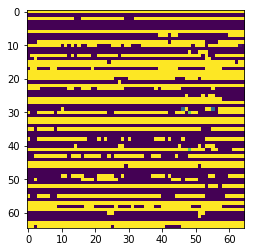

In [44]:
plt.imshow(lena_res)
plt.show()